In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from scipy.interpolate import CubicSpline, interp1d
from nuclear_matter import setup_rc_params
import seaborn as sns
import os

setup_rc_params()
mpl.rcParams['hatch.linewidth'] = 0.6  # Can't be set while plotting

Pick a color palette below. The plot should change accordingly.

In [2]:
black = 'k'  # This is always the same regardless of palette choice
yellow = 'yellow'

# Flat palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
[purple, blue, grey, red, darkblue, green] = flatui
orange = '#f39c12'


# Or pick 'deep', 'muted', etc. from seaborn's palettes
# https://seaborn.pydata.org/tutorial/color_palettes.html
# [darkblue, orange, green, red, purple, brown, pink, grey, tan, blue] = sns.color_palette('deep')


# or Christian's original colors
# purple = 'magenta'; blue = 'cyan'; grey = '0.5'; red = 'red'; darkblue = 'b'; green = 'green'
# orange = 'orange'

In [3]:

# sampling points
Esym = np.linspace(25, 36, 401)  # Use many points for interpolating expt region

avail_srcs = []

# HIC
data_HIC_upper = pd.read_csv("./data/HIC_upper.csv",names=['Esym', 'L']) 
data_HIC_lower = pd.read_csv("./data/HIC_lower.csv",names=['Esym', 'L']) 
spline_HIC_upper = CubicSpline(data_HIC_upper["Esym"], data_HIC_upper["L"])
spline_HIC_lower = CubicSpline(data_HIC_lower["Esym"], data_HIC_lower["L"])
avail_srcs.append({
    "label" : "HIC", "facecolor" : green, 'spline_lower': spline_HIC_lower,
    'spline_upper': spline_HIC_upper, 'Esym': Esym,
    'label_x': 0.8, 'label_y': 0.93, 'ha': 'right', 'va': 'top', 'label_color': 'w',
#     'reference': 'HIC: Tsang, M. B., Zhang, Y., Danielewicz, P., et al., PRL, 102, 122701',
    'reference': 'Tsang \\textit{et al.},\nPRL \\textbf{102}, 122701 (2009)',
})

# Sn neutron skin
data_Sn_upper = pd.read_csv("./data/Sn_skin_upper.csv", names=['Esym', 'L']) 
data_Sn_lower = pd.read_csv("./data/Sn_skin_lower.csv", names=['Esym', 'L']) 
spline_Sn_upper = CubicSpline(data_Sn_upper["Esym"], data_Sn_upper["L"])
spline_Sn_lower = CubicSpline(data_Sn_lower["Esym"], data_Sn_lower["L"])
avail_srcs.append({
    "label" : "Sn Neutron Skin", "facecolor" : blue, 'spline_lower': spline_Sn_lower,
    'spline_upper': spline_Sn_upper, 'Esym': Esym, 'alpha': 0.8,
    'label_x': 0.67, 'label_y': 0.15, 'ha': 'center', 'va': 'center', 'label_color': 'k',
    'rotation': -39,
#     'reference': 'Sn skin: Chen, L.-W., Ko, C. M., Li, B.-A.,  Xu, J., PRC, 82, 024321',
    'reference': 'Chen \\textit{et al.},\nPRC \\textbf{82}, 024321 (2010)',
})

# GDR
data_GDR_upper = pd.read_csv("./data/GDR_upper.csv", names=['Esym', 'L']) 
data_GDR_lower = pd.read_csv("./data/GDR_lower.csv", names=['Esym', 'L']) 
spline_GDR_upper = CubicSpline(data_GDR_upper["Esym"], data_GDR_upper["L"])
spline_GDR_lower = CubicSpline(data_GDR_lower["Esym"], data_GDR_lower["L"])
avail_srcs.append({
    "label" : "GDR", "facecolor" : red, 'spline_lower': spline_GDR_lower,
    'spline_upper': spline_GDR_upper, 'Esym': Esym,
    'label_x': 0.135, 'label_y': 0.02, 'ha': 'left', 'va': 'bottom', 'label_color': 'w',
#     'reference': 'GDR: Trippa, L., Colo, G.,  Vigezzi, E., PRC, 77, 061304',
    'reference': 'Trippa \\textit{et al.},\nPRC \\textbf{77}, 061304 (2008)',
})

# Pb dipole
data_Pb_upper = pd.read_csv("./data/Pb_dipole_upper.csv", names=['Esym', 'L']) 
data_Pb_lower = pd.read_csv("./data/Pb_dipole_lower.csv", names=['Esym', 'L']) 
spline_Pb_upper = CubicSpline(data_Pb_upper["Esym"], data_Pb_upper["L"])
spline_Pb_lower = CubicSpline(data_Pb_lower["Esym"], data_Pb_lower["L"])
pb_dipole_label = "Pb Dipole\nPolarizability"
avail_srcs.append({
    "label": pb_dipole_label, "facecolor" : black, 'spline_lower': spline_Pb_lower,
    'spline_upper': spline_Pb_upper, 'Esym': Esym,
    'hatch': 'xx',
#     'alpha': 0.5,
    'ha': 'center', 'va': 'center', 'label_color': 'k',
#     'label_x': 0.05, 'label_y': 0.26,
#     'bbox': True,
    'label_x': 0.025, 'label_y': 0.235,
    'bbox': True,
    'rotation': 29,
    'fontsize': 8,
#     'reference': 'Pb dipole: X. Roca-Maza, M. Brenna, G. Colo, M. Centelles, X. Vinas et al., PRC 88, 024316'
    'reference': 'Roca-Maza \\textit{et al.},\nPRC \\textbf{88}, 024316 (2013)'
})



# masses
data_masses = pd.read_csv("./data/masses.csv",names=['Esym', 'L'])

# Find the lower and upper parts manually, only used for experimental agreement region
data_masses_upper = data_masses[34:-1].sort_values(by='Esym')
data_masses_lower = data_masses[:34].sort_values(by='Esym')
spline_data_masses_upper = CubicSpline(data_masses_upper["Esym"], data_masses_upper["L"], extrapolate=False)
spline_data_masses_lower = CubicSpline(data_masses_lower["Esym"], data_masses_lower["L"], extrapolate=False)

avail_srcs.append({
    "label" : "Masses", "facecolor" : orange, 'Esym': data_masses['Esym'], 'L': data_masses['L'],
    'label_x': 0.36, 'label_y': 0.208, 'ha': 'center', 'va': 'center', 'label_color': 'k',
    'rotation': 60, 'use_spline': False, 'spline_upper': spline_data_masses_upper,
    'spline_lower': spline_data_masses_lower, 'alpha': 1,
#     'reference': 'Masses: Kortelainen,M., McDonnell, J., Nazarewicz, W. et al., PRC, 82, 024313 (2010)'
    'reference': 'Kortelainen \\textit{et al.},\nPRC \\textbf{82}, 024313 (2010)'
})


# IAS
# data_IAS = pd.read_csv("./data/IAS.csv",names=['Esym', 'L'])
data_IAS = pd.read_csv("./data/IAS_2017.csv",names=['Esym', 'L'])
data_IAS = data_IAS[:-2]

# Find the lower and upper parts manually, only used for experimental agreement region
# data_IAS_upper = data_IAS[24:-2].sort_values(by='Esym')
# data_IAS_lower = data_IAS[:24].sort_values(by='Esym')
# spline_data_IAS_upper = interp1d(
#     data_IAS_upper["Esym"], data_IAS_upper["L"], bounds_error=False, fill_value=np.NaN)
# spline_data_IAS_lower = interp1d(
#     data_IAS_lower["Esym"], data_IAS_lower["L"], bounds_error=False, fill_value=np.NaN)

avail_srcs.append({
    "label" : "IAS + $\Delta R$", "facecolor" : darkblue, 'Esym': data_IAS['Esym'], 'L': data_IAS['L'],
    'label_x': 0.8, 'label_y': 0.67, 'ha': 'right', 'va': 'top', 'label_color': 'w',
    'use_spline': False,
    'rotation': 50,
#     'reference': 'P. Danielewicz, P. Singh and J. Lee, Nucl. Phys. A958, 147 (2017)'
    'reference': 'Danielewicz \\textit{et al.},\nNPA \\textbf{958}, 147 (2017)'
#     'spline_upper': spline_data_IAS_upper,
#     'spline_lower': spline_data_IAS_lower
})

# Hebeler
data_H = pd.read_csv("./data/H.csv", names=['Esym', 'L']) 
avail_srcs.append({
    "label" : "H", "facecolor" : purple, 'Esym': data_H['Esym'], 'L': data_H['L'],
    'label_x': 0.53, 'label_y': 0.35, 'ha': 'right', 'va': 'top', 'label_color': 'k',
    'use_spline': False,
#     'reference': 'H: Hebeler, K., Lattimer, J. M., Pethick, C. J.,  Schwenk, A, PRL, 105, 161102'
    'reference': 'Hebeler \\textit{et al.},\nPRL \\textbf{105}, 161102 (2010)'
})

# Gandolfi
data_G = pd.read_csv("./data/G.csv", names=['Esym', 'L']) 
avail_srcs.append({
    "label" : "G", "facecolor" : grey, 'Esym': data_G['Esym'], 'L': data_G['L'],
    'label_x': 0.65, 'label_y': 0.4, 'ha': 'right', 'va': 'top', 'label_color': 'k',
    'use_spline': False,
#     'reference': 'G: Gandolfi, S., Carlson, J.,  Reddy, S., PRC, 85, 032801'
    'reference': 'Gandolfi \\textit{et al.},\nPRC \\textbf{85}, 032801 (2012)'
})

In [4]:
#### Cell 1 ####
n0 = 0.157 # fm**-3
hbarc = 197.3269718 # MeV fm
Mn = 939.565379; # MeV
EUG0 = 3./(10.*Mn) * np.cbrt(3.*np.pi**2*n0)**2*hbarc**2*0.365 # about 12.64 MeV
E0 = -15.5 # MeV

TewsEtAlSetting = {
    "EUG0" : EUG0, "E0" : E0, "Kn" : 270,
    "Qnlower" : -750., "Qnupper" : 0.
}

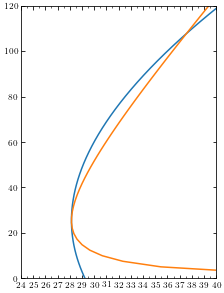

In [5]:
#### Cell 2 #### Label = UG
def getUgConstraint( ut, EUG0, Kn, Qnlower, Qnupper, E0 ):
    taylorDiff = ut-1.
    Qn = np.where(ut < 1, Qnlower, Qnupper)
    Esym = EUG0/(3.*np.cbrt(ut)) * (ut+2.) + Kn/18. * taylorDiff**2 + Qn/81. * taylorDiff**3 - E0
    L = 2.*EUG0/(np.cbrt(ut)) - Kn/3. * taylorDiff - Qn/18. * taylorDiff**2
    return Esym, L

def getUgAnalyticConstraint( L, EUG0, E0 ):
    return L/6. * ( 1. + 2. * (2.* EUG0 / L)**(3/2) ) - E0

#### Cell 3 #### Label “analytic UG”
fig, ax = plt.subplots(figsize=(3.5, 5))
ut=np.linspace(0.001,2,100)
Esym_tews, L_tews = getUgConstraint( ut, **TewsEtAlSetting)

ax.set_xlim(24, 40)
ax.set_ylim(0, 120)
plt.plot(Esym_tews, L_tews)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.xaxis.set_major_locator(MultipleLocator(1))
 
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
 
# now plot analytic constraint
L_grid =np.linspace(0.001,120)
plt.plot(getUgAnalyticConstraint(L_grid, EUG0, E0), L_grid)

Make sure that our interpolants correctly split the Masses and IAS into upper and lower parts:

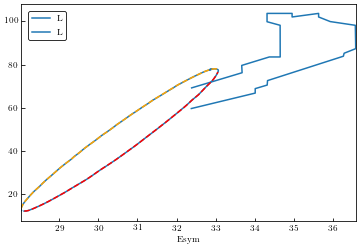

In [6]:
fig, ax = plt.subplots()
data_masses.plot('Esym', 'L', ax=ax, c='C0')
data_IAS.plot('Esym', 'L', ax=ax, c='C0')

ax.plot(Esym, spline_data_masses_upper(Esym), ls='--', c='orange')
ax.plot(Esym, spline_data_masses_lower(Esym), ls='--', c='red')


# ax.plot(Esym, spline_data_IAS_upper(Esym), ls='--', c='orange')
# ax.plot(Esym, spline_data_IAS_lower(Esym), ls='--', c='red');

In [7]:
# def getInterp(kind, upperLower, Esym):
#     functionName= "spline_{kind}_{upperLower}".format(kind=kind, upperLower=upperLower)
#     return eval(functionName)(Esym)

In [8]:
def find_agreement(Esym, labels, sources):
    lower_bound = - np.inf * np.ones(Esym.shape)
    upper_bound = + np.inf * np.ones(Esym.shape)
    for source in sources:
        if source['label'] in labels:
            if 'spline_lower' in source and 'spline_upper' in source:
                lower = source['spline_lower'](Esym)
                upper = source['spline_upper'](Esym)
                
#                 lower = np.where(np.isnan(lower), +np.inf, lower)
#                 upper = np.where(np.isnan(upper), -np.inf, upper)
                lower[np.isnan(lower)] = +np.inf
                upper[np.isnan(upper)] = -np.inf
            else:
                raise ValueError()
            
            lower_bound = np.where(lower > lower_bound, lower, lower_bound)
            upper_bound = np.where(upper < upper_bound, upper, upper_bound)
    return lower_bound, upper_bound

In [9]:
# expt_lower, expt_upper = find_agreement(
#     Esym, ['HIC', "Sn Neutron Skin", "GDR", pb_dipole_label, 'Masses', 'IAS'], avail_srcs
# )
expt_lower, expt_upper = find_agreement(
    Esym, ['HIC', "Sn Neutron Skin", "GDR", pb_dipole_label, 'Masses'], avail_srcs
)
expt_mask = expt_lower < expt_upper

In [10]:
# regularLineStyle = {"ls": "--", "lw" : 0.8}

# def plotSource(ax, kind, color, Esym):
#     if kind in ["H", "G", "masses", "IAS"]:
#         data = "data_" + kind
#         plt.fill(eval(data)["Esym"], eval(data)["L"], facecolor=color, edgecolor='k', **regularLineStyle)
#     else:
#         plt.fill_between(
#             Esym, getInterp(kind, "lower", Esym), getInterp(kind, "upper", Esym),
#             facecolor=color, edgecolor='k', **regularLineStyle
#         )

def plot_source(
    ax, Esym, L=None, spline_lower=None, spline_upper=None, use_spline=True,
    label=None, label_x=0, label_y=0, ha=None, va=None, reference=None,
    label_color='k', rotation=None, bbox=None, fontsize=None,
    facecolor=None, edgecolor='k', ls='-', lw=0.9, hatch=None,
    zorder=None, **kwargs
):
    if not use_spline:
        ax.fill(
            Esym, L, edgecolor=edgecolor, ls=ls, lw=lw, facecolor=facecolor,
            hatch=hatch, zorder=zorder, **kwargs
        )
    else:
        old_facecolor = facecolor
        if hatch is not None:
            facecolor = "none"
        ax.plot(Esym, spline_lower(Esym), c=edgecolor, ls=ls, lw=lw, zorder=zorder)
        ax.plot(Esym, spline_upper(Esym), c=edgecolor, ls=ls, lw=lw, zorder=zorder)
        ax.fill_between(
            Esym, spline_lower(Esym), spline_upper(Esym),
            edgecolor=old_facecolor, ls=ls, lw=0, facecolor=facecolor,
            hatch=hatch, zorder=zorder, **kwargs
        )

    if label is not None:
        if bbox is True:
            bbox = dict(facecolor='w', boxstyle='round', alpha=1)
        ax.text(
            label_x, label_y, label, fontdict=dict(color=label_color),
            rotation=rotation, transform=ax.transAxes, bbox=bbox,
            fontsize=fontsize
        )
    return ax

def add_ref(ref, ax):
    return ax.text(0.05, 0.92, ref, ha='left', va='top', transform=ax.transAxes)

In [11]:
from matplotlib.ticker import AutoMinorLocator

In [12]:
def confidence_ellipse(mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    from matplotlib.patches import Ellipse
    import matplotlib.transforms as transforms

#     cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

#     # Calculating the stdandard deviation of x from
#     # the squareroot of the variance and multiplying
#     # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
#     mean_x = np.mean(x)

#     # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
#     mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [13]:
# Using n=0.16
Esym_L_sat_eft = np.array([32.12073106, 65.86374647])
cov_Esym_L_eft = np.array([
    [ 0.97379613,  5.29651584],
    [ 5.29651584, 32.1700109 ]
])

# Using n=0.16 +/- 0.01
# Esym_L_sat_eft = np.array([31.82132552, 65.01346072])

# cov_Esym_L_eft = np.array([
#     [ 3.24842646,  8.0381468 ],
#     [ 8.0381468 , 34.89044073]
# ])

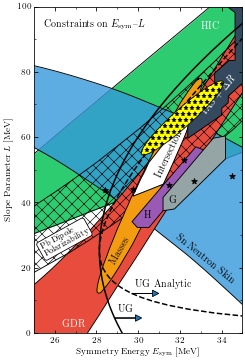

In [18]:
image_type = 'png'

import glob

# Just in case the number of plots changes
files = glob.glob('incremental_plots/*')
for f in files:
    os.remove(f)

def file_out(i, image_type='pdf'):
    """Generate a file name for sequential image output.
    """
    file_base = 'incremental_plots/Lattimer_Esym_L_'
    return file_base + f'{i:02d}' + '.' + image_type

fig, ax = plt.subplots(figsize=(3.4, 5), constrained_layout=True)

# set labels and title
ax.set_xlabel(r"Symmetry Energy $E_\mathrm{sym}$ [MeV]")
ax.set_ylabel(r"Slope Parameter $L$ [MeV]")
# ax.set_title('$E_\mathrm{sym}$--$L$ Correlation')
ax.text(0.05, 0.96, 'Constraints on $E_\mathrm{sym}$--$L$', transform=ax.transAxes, ha='left', va='top')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# set limits
ax.set_xlim(25, 35)
ax.set_ylim(0, 100)
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
# ax.set_yticks([10, 30, 50, 70, 90], minor=True)
# ax.set_yticks([20, 40, 60, 80])

# plot each source separately
i = 0
fig.savefig(file_out(i, image_type))
i += 1


for src in avail_srcs:
    plot_source(ax, zorder=i/10., **src)
    ref = add_ref(src['reference'], ax)
    fig.savefig(file_out(i, image_type))
    ref.remove()
    i += 1
    if src['label'] == 'Masses':
        ax.fill_between(
            Esym[expt_mask], expt_lower[expt_mask], expt_upper[expt_mask],
            lw=1, facecolor='w', edgecolor='k', zorder=i/10
        )
        ax.text(
            0.65, 0.545, 'Intersection', transform=ax.transAxes,
            rotation=64.7, ha='center', va='center', zorder=i/10
        #     fontsize=7,
        )
        fig.savefig(file_out(i, image_type))
        i += 1
        
    
# Plot all experimental constraints
# ax.fill_between(
#     Esym[expt_mask], expt_lower[expt_mask], expt_upper[expt_mask],
#     lw=1, facecolor='w', edgecolor='k', hatch='...'
# )
# ax.annotate(
#     'All Expts.', xy=(0.73, 0.66), xytext=(0.63, 0.585), xycoords=ax.transAxes, textcoords=ax.transAxes,
#     rotation=62, ha='center', va='center', fontsize=7,
#     arrowprops = dict(arrowstyle = "->", connectionstyle=f"angle,angleA={63-180},angleB=-90,rad=15", shrinkA=0, shrinkB=0)
# )

# ax.fill_between(
#     Esym[expt_mask], expt_lower[expt_mask], expt_upper[expt_mask],
#     lw=1, facecolor='w', edgecolor='k',
# )
# ax.text(
#     0.65, 0.545, 'Intersection', transform=ax.transAxes,
#     rotation=64.7, ha='center', va='center',
# #     fontsize=7,
# )

# i += 1
# fig.savefig(file_out(i, image_type))

ut = np.linspace(0.001, 2, 100)
tews_zorder = 11
Esym_tews, L_tews = getUgConstraint( ut, **TewsEtAlSetting)
ax.plot(Esym_tews, L_tews, c='k', zorder=tews_zorder)

idx_arrow_tews = 60
ax.arrow(Esym_tews[idx_arrow_tews], L_tews[idx_arrow_tews], 1, 0, head_length=0.3, head_width=2, zorder=tews_zorder)
ax.text(Esym_tews[idx_arrow_tews]+0.15, L_tews[idx_arrow_tews]+1.4, 'UG', ha='left', va='bottom', zorder=tews_zorder)

# now plot analytic constraint
L_grid = np.linspace(0.001, 120, 100)
Esym_tews_analytic = getUgAnalyticConstraint(L_grid, EUG0, E0)
ax.plot(Esym_tews_analytic, L_grid, c='k', ls='--', zorder=tews_zorder)

idx_arrow_tews_a = 10
ax.arrow(
    Esym_tews_analytic[idx_arrow_tews_a], L_grid[idx_arrow_tews_a], 1, 0,
    head_length=0.3, head_width=2, zorder=tews_zorder)
ax.text(Esym_tews_analytic[idx_arrow_tews_a]+0.15, L_grid[idx_arrow_tews_a]+1.4,
        'UG Analytic', ha='left', va='bottom', zorder=tews_zorder)

# ug_ref = 'UG: Tews, I., Lattimer, J. M., Ohnishi, A. , Kolomeitsev, E. E., APJ 848, 105'
ug_ref = 'Tews \\textit{et al.},\nAPJ \\textbf{848}, 105 (2017)'
ref = add_ref(ug_ref, ax)
i += 1
fig.savefig(file_out(i, image_type))
ref.remove()

# plot Drischler et al. (2016)
# we don't necessarily need to show these data points (no bands)
data_D = pd.read_csv("./data/Drischler_2016.csv", names=['Esym', 'L']) 
ax.scatter(data_D["Esym"], data_D["L"], c="k", marker="*")
stars_ref = 'Drischler \\textit{et al.},\nPRC \\textbf{93}, 054314 (2016)'
ref = add_ref(stars_ref, ax)
i += 1
fig.savefig(file_out(i, image_type))
ref.remove()

confidence_ellipse(
    Esym_L_sat_eft, cov_Esym_L_eft, ax=ax, n_std=2,
    facecolor=yellow, edgecolor='k', hatch='**', zorder=i+1
)
ref = add_ref('This work', ax)
i += 1
fig.savefig(file_out(i, image_type))
ref.remove()

fig.savefig("Lattimer_Esym_L")

Requires ImageMagick

In [15]:
%%bash

convert -delay 100 -loop 1 incremental_plots/*png incremental_plots/Lattimer_Esym_L_animated.gif